# First Challenge
### *Which file corresponds to E. coli?*

## Libraries

In [64]:
import math
import warnings
import itertools
import numpy as np
import pandas as pd
import scipy.special
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

## The good section

In [65]:
#Import the data 
dataA = pd.read_csv('A.fna')
dataB = pd.read_csv('B.fna')
#Basic statistics
print(dataA.describe())

       TGGTCCCACCTGACCCCATGCCGAACTCAGAAGTGAAACGCCGTAGCGCCGATGGTAGTG
count                                               16352          
unique                                              16352          
top     TGGGGTCTCCCCATGCGAGAGTAGGGAACTGCCAGACATCAAATCA...          
freq                                                    1          


In [66]:
#For facility, we will convert the data into numpy arrays
#because in this point, we are not interested in the sequence of every row
A = np.array(np.sum(dataA))
B = np.array(np.sum(dataB))
print(len(A[0]), len(B[0])) #This is the length of the sequence

981073 981073


In [67]:
#Frequency of each nucleotide
print('A:',np.char.count(A[0],'A')/len(A[0]),np.char.count(B[0],'A')/len(B[0]))
print('T:',np.char.count(A[0],'T')/len(A[0]),np.char.count(B[0],'T')/len(B[0]))
print('G:',np.char.count(A[0],'G')/len(A[0]),np.char.count(B[0],'G')/len(B[0]))
print('C:',np.char.count(A[0],'C')/len(A[0]),np.char.count(B[0],'C')/len(B[0]))

A: 0.243998153042638 0.24400019162692277
T: 0.24447212388884415 0.24446396955170513
G: 0.26458683502654745 0.2645888736108322
C: 0.24694288804197037 0.24694696521053988


In [68]:
#Now, let's see how probable is to find a certain certain nucleotide sequence in the array
#For example, how probable is to find the sequence 'AAAAA' in the array
print('In A.fna; Probability to find five A:',np.char.count(A[0],'AAAAA')/len(A[0]))
print('In A.fna; Probability to find five C:',np.char.count(A[0],'CCCCC')/len(A[0]))
print('In A.fna; Probability to find five G:',np.char.count(A[0],'GGGGG')/len(A[0]))
print('In A.fna; Probability to find five T:',np.char.count(A[0],'TTTTT')/len(A[0]))
print('In B.fna; Probability to find five A:',np.char.count(B[0],'AAAAA')/len(B[0]))
print('In B.fna; Probability to find five C:',np.char.count(B[0],'CCCCC')/len(B[0]))
print('In B.fna; Probability to find five G:',np.char.count(B[0],'GGGGG')/len(B[0]))
print('In B.fna; Probability to find five T:',np.char.count(B[0],'TTTTT')/len(B[0]))

#With this information, we can create the correlation matrix
#Play with the entropy
#And crerate a random distribution to compare with the real data

In A.fna; Probability to find five A: 0.001807204968437619
In A.fna; Probability to find five C: 0.00018245329348580584
In A.fna; Probability to find five G: 0.0003587908341173389
In A.fna; Probability to find five T: 0.0017215844284777992
In B.fna; Probability to find five A: 0.0006421540496986463
In B.fna; Probability to find five C: 0.00066457847683098
In B.fna; Probability to find five G: 0.0009907519623921972
In B.fna; Probability to find five T: 0.0007094273310956473


In [69]:
# # To take in acccount the maximum amount of the same type of nucleotide in a row in B.fna
# print('A.fna')
# print('A 10 in a row', np.char.count(B[0],'AAAAAAAAAA')) #This is the maximum amount of A in a row
# print('T 9 in a row', np.char.count(B[0],'TTTTTTTTT')) #This is the maximum amount of T in a row
# print('G 10 in a row', np.char.count(B[0],'GGGGGGGGGGGG')) #This is the maximum amount of G in a row
# print('C 10 in a row', np.char.count(B[0],'CCCCCCCCC')) #This is the maximum amount of C in a row
# print('##################')
# # To take in acccount the maximum amount of the same type of nucleotide in a row in A.fna
# print('B.fna')
# print('A 10 in a row', np.char.count(A[0],'AAAAAAAAAA')) #This is the maximum amount of A in a row
# print('T 10 in a row', np.char.count(A[0],'TTTTTTTTTT')) #This is the maximum amount of T in a row
# print('G 10 in a row', np.char.count(A[0],'GGGGGGGGGG')) #This is the maximum amount of G in a row
# print('C 10 in a row', np.char.count(A[0],'CCCCCCCCC')) #This is the maximum amount of C in a row

#Better create a function to calculate the maximum amount of the same type of nucleotide in a row..

In [70]:
#Here is the function :)
#With this function we can compare the frequency of each nucleotide in the sequence
def nucleotides(array,N):
  letters = ['A','C','G','T'] #Number of nucleotides
  dictionary = {'A': [], 'C': [],'G': [], 'T': []} #Dictionary to store the frequency of each nucleotide
  n=1 #This is the number of nucleotides in a row
  while n < N: #We will calculate the frequency of each nucleotide in a row from 1 to N
    for i in letters: 
      p=np.char.count(array[0],i*n)/(len(array[0])//n) #Frequency of each nucleotide
      dictionary[i].append(p) #Store the frequency in the dictionary
    n=n+1 #Increase the number of nucleotides in a row
  return dictionary

In [71]:
# #Example of the function
# a = np.array(['ACGTAACAAA'])
# x = comparison(A,8)
# x

In [72]:
# Important parameter in the function is N, which is the length of the sequence
#Let's try with 15
N = 15

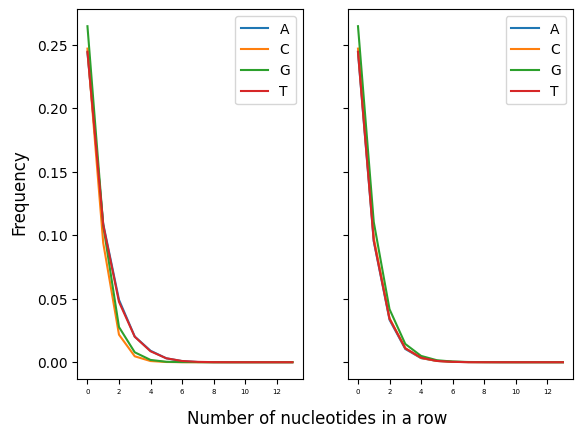

In [73]:
#We can plot the frequency of each nucleotide in the sequence
#This will allow us to see if there is a pattern in the sequence
#For example, if the sequence is periodic
#Or if the sequence is random

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)

ax1.plot(nucleotides(A,N)['A'],label='A') #Frequency of A
ax1.plot(nucleotides(A,N)['C'],label='C') #Frequency of C
ax1.plot(nucleotides(A,N)['G'],label='G') #Frequency of G
ax1.plot(nucleotides(A,N)['T'],label='T') #Frequency of T
ax1.legend()

ax2.plot(nucleotides(B,N)['A'],label='A') #Frequency of A
ax2.plot(nucleotides(B,N)['C'],label='C') #Frequency of C
ax2.plot(nucleotides(B,N)['G'],label='G') #Frequency of G
ax2.plot(nucleotides(B,N)['T'],label='T') #Frequency of T
ax2.legend()

fig.supylabel('Frequency')
fig.supxlabel('Number of nucleotides in a row')

plt.show()

In [74]:
# How we can see, the frequency of each nucleotide 'chain' decrease with the length of the chain
# Theoretically, the frequency of each nucleotide should be the probabability starting from 1/4
# to the power of the length of the chain, i.e. 1/4^N
# With this in mind, we can create a 'random' distribution to compare with the real data, and
# the file less compatible with the theorical one, is the E.coli genome

#Theoretical distribution
def power(probNucleotido, p):
  prob=probNucleotido
  T=[]
  i=1
  while i < p:
    T.append((prob)**i)
    i=i+1
  return T

#Let's see
data = pd.DataFrame(nucleotides(A,N))
data.index = np.arange(1, len(data) + 1)
data
#Cool :)

,A,C,G,T
1,0.243998,0.246943,0.264587,0.244472
2,0.108993,0.093924,0.107725,0.108010
3,0.049143,0.021705,0.027701,0.047526
4,0.020206,0.004648,0.007787,0.020031
5,0.009036,0.000912,0.001794,0.008608
6,0.003076,0.000159,0.000330,0.003082
7,0.000849,0.000021,0.000086,0.000949
8,0.000139,0.000008,0.000033,0.000261
9,0.000018,0.000000,0.000000,0.000046
10,0.000000,0.000000,0.000000,0.000010


### Cheking my approach


In [75]:
prob_AA = np.char.count(A[0],'A')/len(A[0])
prob_AC = np.char.count(A[0],'C')/len(A[0])
prob_AG = np.char.count(A[0],'G')/len(A[0])
prob_AT = np.char.count(A[0],'T')/len(A[0])

prob_BA = np.char.count(B[0],'A')/len(B[0])
prob_BC = np.char.count(B[0],'C')/len(B[0])
prob_BG = np.char.count(B[0],'G')/len(B[0])
prob_BT = np.char.count(B[0],'T')/len(B[0])


a = prob_AA**3
b = prob_AC**3
c = prob_AG**3
p

0.015625

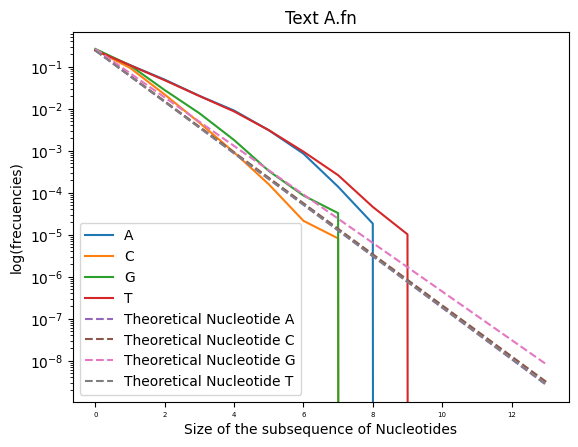

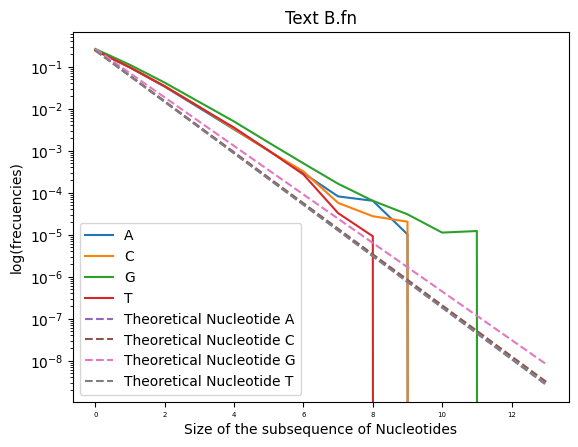

In [76]:
pd.DataFrame(nucleotides(A,N)).plot()
plt.title("Text A.fn")
plt.plot(np.arange(0,N-1,1),power(prob_AA, N),linestyle="dashed",label='Theoretical Nucleotide A')
plt.plot(np.arange(0,N-1,1),power(prob_AC, N),linestyle="dashed",label='Theoretical Nucleotide C')
plt.plot(np.arange(0,N-1,1),power(prob_AG, N),linestyle="dashed",label='Theoretical Nucleotide G')
plt.plot(np.arange(0,N-1,1),power(prob_AT, N),linestyle="dashed",label='Theoretical Nucleotide T')
plt.xlabel("Size of the subsequence of Nucleotides") #take into consideration is an array Zero is one
plt.yscale('log')
plt.ylabel("log(frecuencies)")
plt.legend()
plt.show()

pd.DataFrame(nucleotides(B,N)).plot()
plt.title("Text B.fn")
plt.plot(np.arange(0,N-1,1),power(prob_BA, N),linestyle="dashed",label='Theoretical Nucleotide A')
plt.plot(np.arange(0,N-1,1),power(prob_BC, N),linestyle="dashed",label='Theoretical Nucleotide C')
plt.plot(np.arange(0,N-1,1),power(prob_BG, N),linestyle="dashed",label='Theoretical Nucleotide G')
plt.plot(np.arange(0,N-1,1),power(prob_BT, N),linestyle="dashed",label='Theoretical Nucleotide T')
plt.xlabel("Size of the subsequence of Nucleotides")
plt.yscale('log')
plt.ylabel("log(frecuencies)")
plt.legend()

plt.show()

In [77]:
# fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # Crea una figura con 1 fila y 2 columnas

# axs[0].plot(pd.DataFrame(nucleotides('A', N)))
# axs[0].set_title("Text A.fn")
# axs[0].plot(np.arange(0, N-1, 1), power(N), linestyle="dashed", label='Theoretical')
# axs[0].set_xlabel("Repetitions*")
# axs[0].set_yscale('log')
# axs[0].set_ylabel("log(frequencies)")
# axs[0].legend()

# axs[1].plot(pd.DataFrame(nucleotides('B', N)))
# axs[1].set_title("Text B.fn")
# axs[1].plot(np.arange(0, N-1, 1), power(N), linestyle="dashed", label='Theoretical')
# axs[1].set_xlabel("Repetitions*")
# axs[1].set_yscale('log')
# axs[1].set_ylabel("log(frequencies)")
# axs[1].legend()

In [78]:
#Frequencies in A
A_AA = np.char.count(A[0],'AA')/len(A[0])
A_AC = np.char.count(A[0],'AC')/len(A[0])
A_AG = np.char.count(A[0],'AG')/len(A[0])
A_AT = np.char.count(A[0],'AT')/len(A[0])

A_CA = np.char.count(A[0],'CA')/len(A[0])
A_CC = np.char.count(A[0],'CC')/len(A[0])
A_CG = np.char.count(A[0],'CG')/len(A[0])
A_CT = np.char.count(A[0],'CT')/len(A[0])

A_GA = np.char.count(A[0],'GA')/len(A[0])
A_GC = np.char.count(A[0],'GC')/len(A[0])
A_GG = np.char.count(A[0],'GG')/len(A[0])
A_GT = np.char.count(A[0],'GT')/len(A[0])

A_TA = np.char.count(A[0],'TA')/len(A[0])
A_TC = np.char.count(A[0],'TC')/len(A[0])
A_TG = np.char.count(A[0],'TG')/len(A[0])
A_TT = np.char.count(A[0],'TT')/len(A[0])


#Frequencies in B
B_AA = np.char.count(B[0],'AA')/len(B[0])
B_AC = np.char.count(B[0],'AC')/len(B[0])
B_AG = np.char.count(B[0],'AG')/len(B[0])
B_AT = np.char.count(B[0],'AT')/len(B[0])

B_CA = np.char.count(B[0],'CA')/len(B[0])
B_CC = np.char.count(B[0],'CC')/len(B[0])
B_CG = np.char.count(B[0],'CG')/len(B[0])
B_CT = np.char.count(B[0],'CT')/len(B[0])

B_GA = np.char.count(B[0],'GA')/len(B[0])
B_GC = np.char.count(B[0],'GC')/len(B[0])
B_GG = np.char.count(B[0],'GG')/len(B[0])
B_GT = np.char.count(B[0],'GT')/len(B[0])

B_TA = np.char.count(B[0],'TA')/len(B[0])
B_TC = np.char.count(B[0],'TC')/len(B[0])
B_TG = np.char.count(B[0],'TG')/len(B[0])
B_TT = np.char.count(B[0],'TT')/len(B[0])

#For have the same limits in the colorbar, we need to define the vmin and vmax
vmin, vmax = 0.045, 0.085

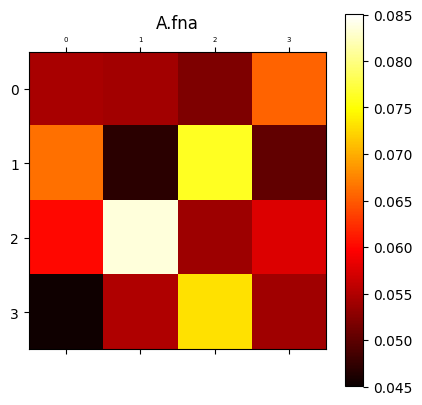

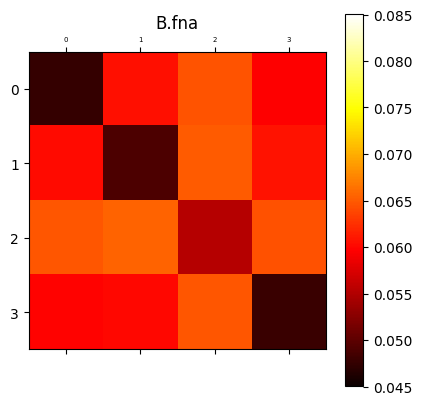

In [79]:
plt.matshow([[A_AA,A_AC,A_AG,A_AT],[A_CA,A_CC,A_CG,A_CT],[A_GA,A_GC,A_GG,A_GT],[A_TA,A_TC,A_TG,A_TT]], cmap='hot', vmin = vmin, vmax = vmax)
plt.colorbar()
plt.title('A.fna')

plt.matshow([[B_AA,B_AC,B_AG,B_AT],[B_CA,B_CC,B_CG,B_CT],[B_GA,B_GC,B_GG,B_GT],[B_TA,B_TC,B_TG,B_TT]], cmap='hot', vmin = vmin, vmax = vmax)
plt.colorbar()
plt.title('B.fna')
plt.show()

In [80]:
#Maybe more pretty and compact?

# #We can create a matrix with the probability of finding a certain nucleotide sequence
# #This will allow us to see if there is a pattern in the sequence
# fig, (ax1, ax2) = plt.subplots(1, 2)
# vmin, vmax = 0.045, 0.085
# # Calcular el aspecto de la imagen colorbar
# im_ratio = A.shape[0] / A.shape[0]

# fig.suptitle('Comparison of A.fna and B.fna sequences in a matrix form')
# ax1.set_title('A.fna')
# ax1.matshow([[A_AA,A_AC,A_AG,A_AT],[A_CA,A_CC,A_CG,A_CT],[A_GA,A_GC,A_GG,A_GT],[A_TA,A_TC,A_TG,A_TT]], cmap='BuGn')
# ax1.set_xticklabels(['','A', 'C', 'G', 'T'])
# ax1.set_yticklabels(['','A', 'C', 'G', 'T'])
# Aax1 = ax1.matshow([[A_AA,A_AC,A_AG,A_AT],[A_CA,A_CC,A_CG,A_CT],[A_GA,A_GC,A_GG,A_GT],[A_TA,A_TC,A_TG,A_TT]], cmap='BuGn', vmin=vmin, vmax=vmax)
# # fig.colorbar(Aax1, fraction=0.047 * im_ratio)
# ax2.set_title('B.fna')
# ax2.matshow([[B_AA,B_AC,B_AG,B_AT],[B_CA,B_CC,B_CG,B_CT],[B_GA,B_GC,B_GG,B_GT],[B_TA,B_TC,B_TG,B_TT]], cmap='BuGn')
# ax2.set_xticklabels(['','A', 'C', 'G', 'T'])
# ax2.set_yticklabels(['','A', 'C', 'G', 'T'])
# Aax2 = ax2.matshow([[B_AA,B_AC,B_AG,B_AT],[B_CA,B_CC,B_CG,B_CT],[B_GA,B_GC,B_GG,B_GT],[B_TA,B_TC,B_TG,B_TT]], cmap='BuGn', vmin=vmin, vmax=vmax)
# fig.colorbar(Aax2, fraction=0.047 * im_ratio)
# plt.show()

## Hyopothesis Test (Discussion with Joshua)

We will now calculate the probability distribution of n-tuples and compare the results for both files. If one of the files consists of random permutations, its probabilities should resemble those of independently and identically distributed (iid) sampling.

In other words, $p(N_1, N_2, ..., N_n) \approx p(N_1) p(N_2) \cdots p(N_n)$

To compute this probabilities, we will consider the following:

- For sequential (non-overlapping) n-tuples, we can generate $\frac{N}{n}$ n-tuples of length n. $\frac{N}{n}$
- If we allow the starting point to vary (which makes sense because the transcription starting point is unknown, and we want to account for alternative splicing and other factors), any of the N letters can serve as the starting point, except for the last $n-1$. Thus, we can form $N-(n-1)$ n-tuples

### Null Hypothesis
$H_0$ : The file can be considered as a sequential series of codons (triplets) sampled from an iid multinomial distribution, with the probability for each codon $N_1$, $N_2$, $N_3$ given by

$$p(N_1, N_2, ..., N_n) \approx p(N_1)p(N_2)\cdot\cdot\cdot p(N_n)$$

Under this hypothesis, we can compute the probability of observing the counts $x_i$ (with no overlap) for each codon $i$.

Recall that the multinomial distribution for $n$ trials and $k$ categories is:

$$ p(x_1, x_2, ..., x_k; n) = n! \frac{\prod_{i}^{k} p_i^{x_i}}{\prod_i^k x_i!} $$

We will compute the logarithm of this probability.


In [81]:
# Define funtions that give probability of an ntuple to appear

# Overlapping
def prob_ntuple(Z, ntuple):
    ''' Return probability of finding an n-letter word to appear, considering overlapping subchains'''
    N = len(Z)
    n = len(ntuple)
    normalization = (N-n+1)
    
    results=0
    for i in range(N-n+1):
        if Z[i:i+n] == ntuple:
            results += 1
    return results/normalization

# Non-overlapping
def prob_ntuple_no_overlap(Z, ntuple):
    ''' Return probability of finding an n-letter word to appear, considering non-overlapping subchains'''
    N=len(Z)
    n=len(ntuple)
    normalization = N//n

    results=0
    for i in range(0,N-n,n):
        if Z[i:i+n] == ntuple:
            results += 1
    return results/normalization

In [82]:
# I worked mostly using dictionaries, but I want to switch to DataFrames now, because it's easier to plot them. 
# I might also want to convert to ndarrays to handling the data, so instead of changing the code, 
# I created this function to convert to different data types:

def convert(my_dict, to_type='DataFrame'):
    if to_type=='DataFrame':
        return pd.DataFrame.from_dict(my_dict, orient='index', columns=['P'])
    else:
        raise ValuError(f'Datatype{to_type} not supported')

temp = open('A.fna','r').read().split('\n')
A = ''.join(temp)

temp = open('B.fna','r').read().split('\n')
B = ''.join(temp)

#The string C will be used for testing the functions
C='HOOOOLA\nwey'

def isDNA(Z):
    ''' Checks whether the sequence Z contains only vald nucleotides (A,T,G or C)
    Returns a boolean and a message pointing out letters which are not valid nucleotides'''
    nonNuc=[]
    for N in Z:
        if N!='A' and N!='T' and N!='G' and N!='C':# and N!='\n':
            nonNuc.append(N)
    if len(nonNuc)==0: # If I didn't find any character not corresponding to a nucleotide, consider it as a valid DNA sequence
        toPrint='All letters are valid nucleotides'
        return(True, toPrint)
    else:
        toPrint = f'The sequence contains the letters: {nonNuc}, which are not a valid nucleotides'
        return(False, toPrint)


# Define N as the number of nucleotides in the sequences
N = len(A)


def probNuc(Z, N):
    ''' Returns the empirical probability of finding a nucleotide N in the sequence'''
    num_N = Z.count(N)/len(Z)
    return num_N

A_single_probs = {}
B_single_probs = {}

for nuc in ['A', 'T', 'C', 'G']:
    A_single_probs[nuc] = probNuc(A,nuc)
    B_single_probs[nuc] = probNuc(B,nuc)

In [83]:
# Define funtions that give probability of an ntuple to appear

# Overlapping
def prob_ntuple(Z, ntuple):
    ''' Return probability of finding an n-letter word to appear, considering overlapping subchains'''
    N = len(Z)
    n = len(ntuple)
    normalization = (N-n+1)
    
    results=0
    for i in range(N-n+1):
        if Z[i:i+n] == ntuple:
            results += 1
    return results/normalization

# Non-overlapping
def prob_ntuple_no_overlap(Z, ntuple):
    ''' Return probability of finding an n-letter word to appear, considering non-overlapping subchains'''
    N=len(Z)
    n=len(ntuple)
    normalization = N//n

    results=0
    for i in range(0,N-n,n):
        if Z[i:i+n] == ntuple:
            results += 1
    return results/normalization

In [84]:
# Compute probabilities for each codon

# Initialize containers
A_codons, B_codons, iid_codons = ({}, {}, {})
A_codons_no_overlap, B_codons_no_overlap = ({}, {})
for i in itertools.product(['A','T', 'C', 'G'],  repeat=3):
    codon= ''.join(i)
    # Filling probabilities for file A
    A_codons[codon] = prob_ntuple(A,codon)
    A_codons_no_overlap[codon] = prob_ntuple_no_overlap(A,codon)
    # Filling probabilities for file A
    B_codons_no_overlap[codon] = prob_ntuple_no_overlap(B,codon)
    B_codons[codon] = prob_ntuple(B,codon)
    # Filling reference probabilities as sampled iid from single-nucleotide probabilities
    iid_codons[codon] = A_single_probs[i[0]]*A_single_probs[i[1]]*A_single_probs[i[2]]
    
    #print(codon, A_codons[codon], B_codons[codon])

In [85]:
'''Plotting the results'''
def step_plot(title, toplot_asstep, labels_asstep, toplot_asline=None, labels_asline=None, 
              xlabel='Codon', ylabel='Frequency'):
    # Make the step plots
    for Z_probs,Z_label in zip(toplot_asstep,labels_asstep):
        plt.step(Z_probs.keys(), Z_probs.values(), label=Z_label)
    # Make the line plots
    for Z_probs,Z_label in zip(toplot_asline,labels_asline):
        plt.plot(Z_probs.keys(), Z_probs.values(), label=Z_label)
    # Plot labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # Formatting
    plt.xticks(rotation=45)
    plt.legend(loc='best')
    # plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=5)    # fontsize of the tick labels
    plt.grid()
    # Display
    plt.show()

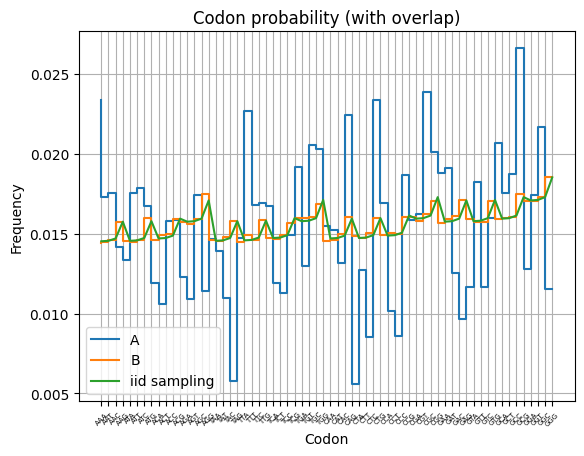

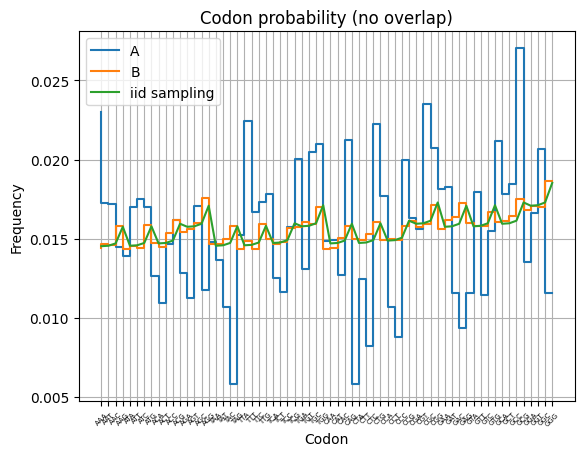

In [86]:
step_plot('Codon probability (with overlap)', [A_codons, B_codons], ['A', 'B'], toplot_asline=[iid_codons], labels_asline=['iid sampling'],
         xlabel='Codon', ylabel='Frequency')

step_plot('Codon probability (no overlap)', [A_codons_no_overlap, B_codons_no_overlap], ['A', 'B'], toplot_asline=[iid_codons], 
          labels_asline=['iid sampling'], xlabel='Codon', ylabel='Frequency')

First, we observe that the distributions remain unchanged whether we consider overlapping or non-overlapping subchains. Additionally, we notice that the distribution from file B closely resembles that of random iid sampling **his strongly suggests that file A is the actual genome**

### Testing $H_0$

In [87]:
n=N//3    # Number of codons
p=4**(-3) # Approximate robability of a codon

def log_prob(A_codons_no_overlap):
    sum_log_xi_fact = 0                            # \sum_i log(x_i)!
    sum_xi_log_pi = 0                              # \sum_i (x_i \log(p_i))
    for k in A_codons_no_overlap.keys():
        x = A_codons_no_overlap[k]*n 
        sum_log_xi_fact += x*math.log(x)-x #Using Stirling
        pi = iid_codons[k]
        sum_xi_log_pi += x*math.log(pi)
    log_nfact = n*math.log(n)-n                     # log(n!), using Stirling
    return (log_nfact+sum_xi_log_pi-sum_log_xi_fact)

A_logprob = log_prob(A_codons_no_overlap)
B_logprob = log_prob(B_codons_no_overlap)

print(f'A has a prob to occur of e^{int(A_logprob)}, while B has a prob to occur of e^{int(B_logprob)}')
print(f'Sample space is 64^{n}, approximately e^{n*int(math.log(64))}')

A has a prob to occur of e^-12334, while B has a prob to occur of e^-34
Sample space is 64^327044, approximately e^1308176


Based on the definition of the p-value, we will define it as the probability to observe a deviation from the null hypothesis at least as extreme as that observed in the data. Looking at our data, the value that deviates the most from the multinomial distribution is that of the codon GCG. What is the probability of obtaining at least those many times the codon GCG given the null hypothesis?

In [88]:
def deviation_from_iid(Z_codons_no_overlap):
    '''Return the codon with max deviation from iid probabilities and the number of times it appears '''
    Z_deviations = [(Z_codons_no_overlap[k]-iid_codons[k]) for k in iid_codons.keys()]
    #Z_deviations = [np.abs(Z_codons_no_overlap[k]-iid_codons[k]) for k in iid_codons.keys()]
    max_deviation = max(Z_deviations)
    max_codon_index = Z_deviations.index(max_deviation)
    max_codon = list(Z_codons_no_overlap.keys())[max_codon_index]
    max_prob = Z_codons_no_overlap[max_codon]
    iid_prob = iid_codons[max_codon]
    return max_codon, math.floor(max_prob*n), math.floor(iid_prob*n), iid_prob

def compute_pvalue(Z_md_realn, Z_md_predictedn, Z_hyp_prob):
    ''' Returns probability of observing a result at least as extreme as that observed given the sampling comes from Multinomial trials. 
        If the observed result is greater than expected, returns the 1- cummulative probability, else returns the cummulative probability'''
    CDFprob = scipy.special.betainc(n-Z_md_realn, 1+Z_md_realn, 1-Z_hyp_prob)
    if Z_md_realn > Z_md_predictedn:
        return 1-CDFprob
    else:
        return CDFprob

A_md_codon, A_md_n, A_md_iid_n, A_md_iid_p = deviation_from_iid(A_codons)
B_md_codon, B_md_n, B_md_iid_n, B_md_iid_p = deviation_from_iid(B_codons)

print('File \t codon with max deviation \t appears \t predicted to appear')
print(f'A \t {A_md_codon} \t \t \t \t {A_md_n} \t \t {A_md_iid_n}')
print(f'B\t {B_md_codon} \t \t \t \t {B_md_n} \t \t {A_md_iid_n} \n')

A_p_value=1-scipy.special.betainc(n-A_md_n, 1+A_md_n, 1-A_md_iid_n)
B_p_value=1-scipy.special.betainc(n-B_md_n, 1+B_md_n, 1-B_md_iid_n)
print(f'p-value for A: {compute_pvalue(A_md_n, A_md_iid_n, A_md_iid_p)}')
print(f'p-value for B: {compute_pvalue(B_md_n, B_md_iid_n, B_md_iid_p)}')

File 	 codon with max deviation 	 appears 	 predicted to appear
A 	 GCG 	 	 	 	 8700 	 	 5653
B	 AGG 	 	 	 	 5711 	 	 5653 

p-value for A: 0.0
p-value for B: 0.04606135811134027


## The fail section

### Entropy Section

Entropy A: nan
Entropy B: nan
Mutual Information: nan


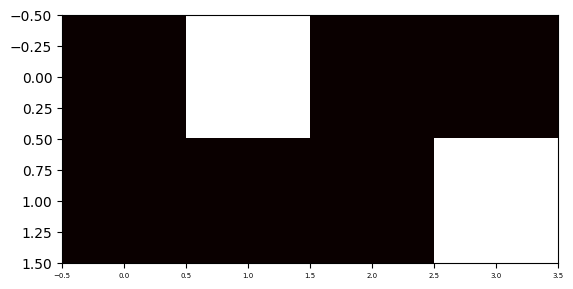

In [89]:
#We can calculate the entropy of the sequence
#The entropy of a sequence is given by the formula:
#H = -sum(p(x)*log(p(x)))
#Where p(x) is the probability of finding a certain nucleotide in the sequence
#The entropy is a measure of the uncertainty of a sequence
#The higher the entropy, the more uncertain the sequence is
#The lower the entropy, the more certain the sequence is
#The entropy of a sequence is a measure of the information content of the sequence
H_A = -np.char.count(A[0],'A')/len(A[0])*np.log(np.char.count(A[0],'A')/len(A[0]))-np.char.count(A[0],'T')/len(A[0])*np.log(np.char.count(A[0],'T')/len(A[0]))-np.char.count(A[0],'G')/len(A[0])*np.log(np.char.count(A[0],'G')/len(A[0]))-np.char.count(A[0],'C')/len(A[0])*np.log(np.char.count(A[0],'C')/len(A[0]))
print('Entropy A:',H_A)
H_B = -np.char.count(B[0],'A')/len(B[0])*np.log(np.char.count(B[0],'A')/len(B[0]))-np.char.count(B[0],'T')/len(B[0])*np.log(np.char.count(B[0],'T')/len(B[0]))-np.char.count(B[0],'G')/len(B[0])*np.log(np.char.count(B[0],'G')/len(B[0]))-np.char.count(B[0],'C')/len(B[0])*np.log(np.char.count(B[0],'C')/len(B[0]))
print('Entropy B:',H_B)

#We can calculate the mutual information between the two sequences
#The mutual information between two sequences is given by the formula:
#I = H(A) + H(B) - H(A,B)
#Where H(A) is the entropy of sequence A
#H(B) is the entropy of sequence B
#H(A,B) is the joint entropy of sequences A and B
#The mutual information is a measure of the information that two sequences share
#The higher the mutual information, the more information the two sequences share
#The lower the mutual information, the less information the two sequences share
I = H_A + H_B - (-np.char.count(A[0],'A')/len(A[0])*np.log(np.char.count(A[0],'A')/len(A[0]))-np.char.count(A[0],'T')/len(A[0])*np.log(np.char.count(A[0],'T')/len(A[0]))-np.char.count(A[0],'G')/len(A[0])*np.log(np.char.count(A[0],'G')/len(A[0]))-np.char.count(A[0],'C')/len(A[0])*np.log(np.char.count(A[0],'C')/len(A[0]))-np.char.count(B[0],'A')/len(B[0])*np.log(np.char.count(B[0],'A')/len(B[0]))-np.char.count(B[0],'T')/len(B[0])*np.log(np.char.count(B[0],'T')/len(B[0]))-np.char.count(B[0],'G')/len(B[0])*np.log(np.char.count(B[0],'G')/len(B[0]))-np.char.count(B[0],'C')/len(B[0])*np.log(np.char.count(B[0],'C')/len(B[0])))
print('Mutual Information:',I)

plt.imshow(np.array([np.char.count(A[0],'A')/len(A[0]),np.char.count(A[0],'T')/len(A[0]),np.char.count(A[0],'G')/len(A[0]),np.char.count(A[0],'C')/len(A[0]),np.char.count(B[0],'A')/len(B[0]),np.char.count(B[0],'T')/len(B[0]),np.char.count(B[0],'G')/len(B[0]),np.char.count(B[0],'C')/len(B[0])]).reshape(2,4),cmap='hot',interpolation='nearest')

### My first approach; (fail section) 

### Identify the tools that help me to solve this question

*Biopython*
One of the goals looks like it could work to find a solution:
* Genomic data analysis.

In [90]:
# Aseq1 = A.iloc[0, 0]
# Bseq1 = B.iloc[0, 0]

In [91]:
# print(Aseq1.count('A'))
# print(Aseq1.count('C'))
# print(Aseq1.count('G'))
# print(Aseq1.count('T'))
# print('----------------------')
# print(Bseq1.count('A'))
# print(Bseq1.count('C'))
# print(Bseq1.count('G'))
# print(Bseq1.count('T'))

In [92]:
# sumecoli1 = A.sum()

In [93]:
# print(sumecoli1)

In [94]:
# A = print(Aseq1.count('A'))
# C = print(Aseq1.count('C'))
# G = print(Aseq1.count('G'))
# T =print(Aseq1.count('T'))
# print('----------------------')
# print(Bseq1.count('A'))
# print(Bseq1.count('C'))
# print(Bseq1.count('G'))
# print(Bseq1.count('T'))

### Another resources

In [95]:
# from Bio.SeqIO import parse
# from Bio.SeqRecord import SeqRecord
# from Bio.Seq import Seq


In [96]:
# records = parse(, "fasta") for record in records:    
#    print("Id: %s" % record.id) 
#    print("Name: %s" % record.name) 
#    print("Description: %s" % record.description) 
#    print("Annotations: %s" % record.annotations) 
#    print("Sequence Data: %s" % record.seq) 
#    print("Sequence Alphabet: %s" % record.seq.alphabet)

# Answer

* The Good Section:
_Based on our observations, it seems likely that the file corresponding to E. Coli's DNA is A.fna. This inference is drawn from the nucleotide frequency in file A, which deviates more significantly from the theoretical distribution. Additionally, the matrix in file B appears more uniform compared to the matrix in file A, further supporting the probability that file A is the correct one._

* Hypothesis Test:
_Again, we discard the Null hypothesis for A (because with p_value equal to 0 is weird, I am not sure about that result but I already double-check and I didn't find any mistake) and catalog as non-conclusive the test for B_